## This notebook makes the plots for Figure 3 and associated supplementary figures S8 and S9

In [1]:
#packages
import mat73
import os
from scipy.io import loadmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy
import importlib
#from skimage import io
from matplotlib import cm
import matplotlib.colors as mcolors
import imageio
import statsmodels.stats.multitest
from tqdm import tqdm
from matplotlib import gridspec
#import svglib
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix

#import methods
from Figure3_methods_frequency import *
from Figure3_methods_location import *
from analysis_utils import *


In [2]:
#this is used to run linear mixed models. Matlab engine needs to be installed
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
#IMPORTANT!!!! 
#Change this path to the data folder path in your system
ops = {} 
ops['dataPath'] = os.path.join('Z:', 'home', 'shared', 'Alex_analysis_camp', 'data_axonsPaper')

### Define variables for future use

In [4]:
ops['outputPath'] = os.path.join(ops['dataPath'],'analysisOutputs')
ops['areas'] = ['V1','P','POR','LI', 'LM', 'AL','RL','A','AM', 'PM']
ops['mm'] = 0.0393701
ops['myColorsDict'] = {'HVA_colors' : {'V1': '#4A443F', 
                        'POR': '#FF8623', #4C9E57
                        'P': '#FFB845', #AAC255
                        'LI': '#F5501E', #79B855            
                        'LM' : '#EB7C6C',
                        'AL' : '#DB839F',                
                        'RL' : '#BB83DB',
                        'A': '#8172F0',
                        'AM': '#4062F0',
                        'PM': '#6CBEFF',                                                  
                        'OUT': 'lightgray',
                        'ventral': '#FF8623',
                        'dorsal': '#4062F0',
                        'dorso-ventral': '#A161A4'}} #FF8606
ops['dorsal'] = ['AM', 'PM', 'A', 'RL'] 
ops['ventral'] = ['P', 'POR', 'LI', 'LM', 'AL']  
ops['groups'] = ['V1', 'Ventral', 'Dorsal'] 
ops['colors_groups'] = ['#4A443F',ops['myColorsDict']['HVA_colors']['POR'],ops['myColorsDict']['HVA_colors']['AM']] 
ops['color_motor'] = '#FF9D00'
ops['color_stim'] = '#1368F0'
ops['color_full'] = '#C90700'
ops['color_stimSub'] =  '#BF65C9' 
ops['color_motorSub'] = '#008D36'

ops['azimuths'] = ['-108','-90','-72','-54','-36','-18','0','18','36','54','72','90','108']
ops['freq_names'] = ['2', '4', '8', '16', '32', '64']

ops['ref'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice.png'))
ops['ref2'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice_uncropped.png'))
ops['map_V1'] = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_V1Marked.png'))
map_colors = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_colors.png'))
ops['map_colors'] = map_colors[:,:,0:3]
ops['colors_LUT'] = np.load(os.path.join(ops['dataPath'],'reference_maps','colorMap_LUT_allen.npy'), allow_pickle = True).item()
       
groups = np.load(os.path.join(ops['dataPath'],'injectionPosition_groups.npy'), allow_pickle=True).item()
ops['ventralAnimals'] = groups['ventralAnimals']
ops['dorsalAnimals'] = groups['dorsalAnimals']
ops['posteriorAnimals'] = groups['posteriorAnimals']
ops['anteriorAnimals'] = groups['anteriorAnimals']

### Sound frequency dataset

In [5]:
#load dataframe with data for each bouton
df = pd.read_csv(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_freq_peak_boutons.csv'))
maps = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'maps_freq_green_dataset_all_GLM_motorSub_adj.npy'))
df_fit = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'df_fit_frequencies_motorSub_all.npy'), allow_pickle=True).item()

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


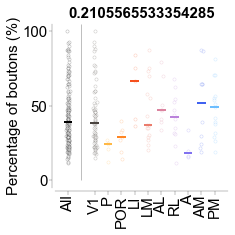

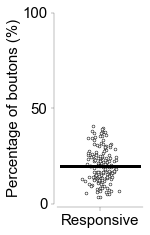

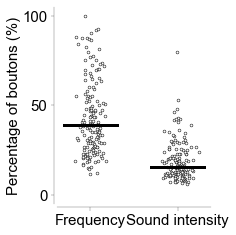

In [6]:
#quantify proportions of responsive and frequency-tuned 
quantifySignificance_frequencies(df,eng, ops)

In [7]:
#select botuons that are frequency selective, with one main tuning peak 
sel_green_freq = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'selective_freq_idx_boutons.npy'))
singlePeak, doublePeak = classifyFreqSplines(df_fit['freq_curve'], 0.75)

includeIdx0 = np.intersect1d(sel_green_freq, singlePeak)                       
noArea_idx = np.nonzero(np.array(df['area']) == 'OUT')[0]
includeIdx = np.setdiff1d(includeIdx0, noArea_idx)

df0 = df.iloc[includeIdx] 
maps0 = maps[includeIdx,::]
data0 = df_fit['spline_peak'][includeIdx]

100%|███████████████████████████████████████████████████████████████████████| 442648/442648 [00:06<00:00, 73211.50it/s]


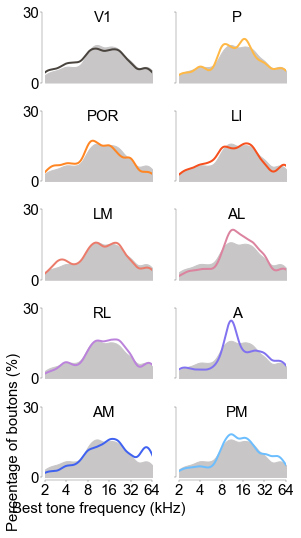

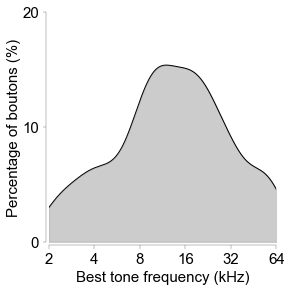

In [8]:
#best frequency distribution for boutons in all areas together, and separated by area
fig = plt.figure(figsize=(100*ops['mm'], 200*ops['mm']), constrained_layout=False)
plotFreqDistribution_byArea(df0, data0, ops, fig)

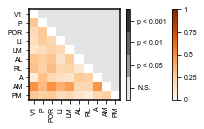

In [9]:
#Comparison of best frequency distribution between area pairs
name = 'hierarchicalBootstrap_frequencies_boutons_byArea'

plotHierarchicalBootstrap_FV(name, ops)

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


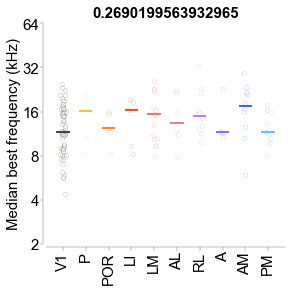

In [10]:
#Comparison of best frequency across areas, with boutons grouped by session
fig = plt.figure(figsize=(100*ops['mm'], 100*ops['mm']), constrained_layout=True)
plotFrequency_bySession(df0, data0, ops,eng,fig)

C:\Users\egeaa\Documents\GitHub\AC-VC-paper\Figure3_methods_frequency.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streamIdx'] = t
C:\Users\egeaa\Documents\GitHub\AC-VC-paper\Figure3_methods_frequency.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spline_peak'] = data
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


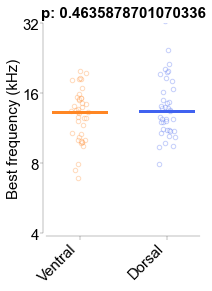

In [11]:
#Comparison of best frequency across visual steams, with boutons grouped by session
plotFreqDistribution_byStream(df0, data0, ops, eng)

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


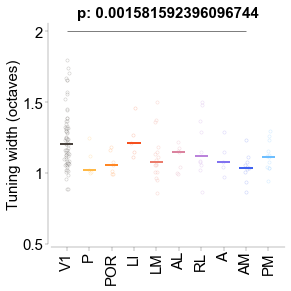

In [12]:
#Comparison of tuning width across visual areas
width0 = df_fit['spline_fwhm'][includeIdx]
plotTuningWidth_byArea(df0, width0, ops,eng)

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


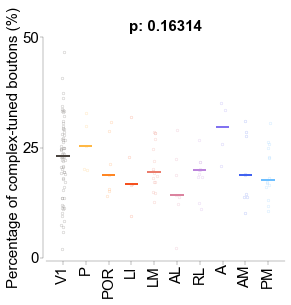

In [13]:
#Complex tuning
includeIdx0 = sel_green_freq
                             
noArea_idx = np.nonzero(np.array(df['area']) == 'OUT')[0]
includeIdx = np.setdiff1d(includeIdx0, noArea_idx)

doubleIdx = np.intersect1d(doublePeak, includeIdx)

plotProportionComplexFreq(df,includeIdx, doubleIdx, ops, eng)

C:\Users\egeaa\Documents\GitHub\AC-VC-paper\analysis_utils.py:779: RuntimeWarning: invalid value encountered in double_scalars
  si0 =  (np.nansum(responses/len(responses)))**2/np.nansum(((responses**2)/len(responses)))
C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


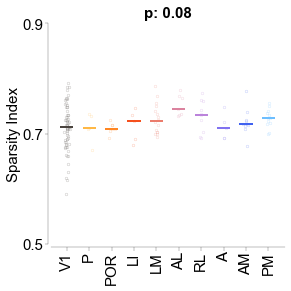

In [14]:
#Sparsity index
includeIdx0 = np.intersect1d(sel_green_freq, singlePeak)                       
noArea_idx = np.nonzero(np.array(df['area']) == 'OUT')[0]
includeIdx = np.setdiff1d(includeIdx0, noArea_idx)

df1 = df.iloc[includeIdx]
si = getSparsityIdx(maps)

plotSparsityIdx_byArea(df1, si[includeIdx], ops, eng)

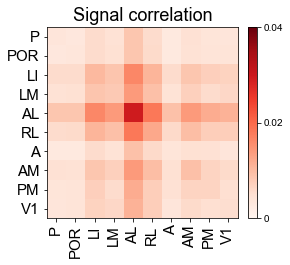

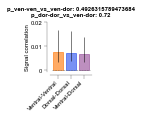

In [15]:
############ Signal correlation ################################################
resp_green_freq = np.load(os.path.join(ops['dataPath'],'frequencies_dataset', 'responsive_freq_idx_boutons.npy'))

%run methods_Figure3.ipynb
%run analysis_utils.ipynb

df_resp_boutons = df.iloc[resp_green_freq]

plotSignalCorrelation_byArea_FV(df_resp_boutons, ops, computeMatrix =0) #compute matrix loads all pairwise signal correlations, which takes a while

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


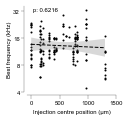

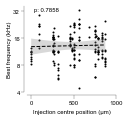

In [16]:
#Effect of innjection location
plotFrequency_againstSource(df0, data0, ops, eng)

### Location tuning dataset

C:\Users\egeaa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


0.018568728750941073
0.05828133285143947


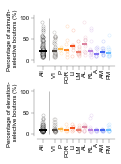

In [17]:
df = pd.read_csv(os.path.join(ops['dataPath'],'locations_dataset', 'df_coliseum_boutons_final.csv')) #dataframe with info for each roi
quantifySignificance_coliseum_v2(df,ops)

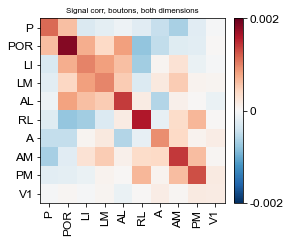

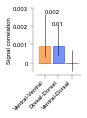

In [18]:
resp_boutons_idx= np.load(os.path.join(ops['dataPath'], 'locations_dataset','responsive_idx_coliseum_boutons.npy'))
df_resp_axons = df.iloc[resp_boutons_idx]

plotSignalCorrelation_byArea_CS(df_resp_axons, ops, mode = 'all', computeMatrix =0) #compute matrix loads all pairwise signal correlations, which takes a while

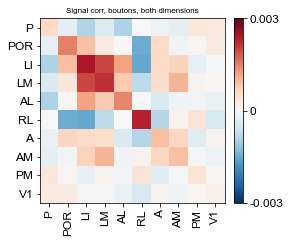

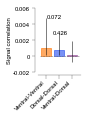

In [19]:
#Only azimuth tuning
plotSignalCorrelation_byArea_CS(df_resp_axons, ops, mode = 'azi', computeMatrix =0) #compute matrix loads all pairwise signal correlations, which takes a while

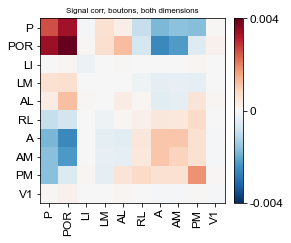

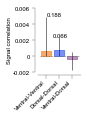

In [20]:
#Only elevation tuning
plotSignalCorrelation_byArea_CS(df_resp_axons, ops, mode = 'elev', computeMatrix =0) #compute matrix loads all pairwise signal correlations, which takes a while

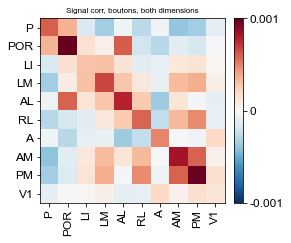

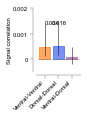

In [21]:
resp_boutons_idx= np.load(os.path.join(ops['dataPath'], 'locations_dataset','responsive_idx_coliseum_boutons.npy'))
axonIdx = np.load(os.path.join(ops['dataPath'], 'locations_dataset','axonIdx_coliseum_motorSub.npy'))
resp_axons_idx = np.intersect1d(resp_boutons_idx, axonIdx)
df_resp_axons = df.iloc[resp_axons_idx]

#Grouped boutons into axons
plotSignalCorrelation_byArea_CS(df_resp_axons, ops, mode = 'axons', computeMatrix =0) #compute matrix loads all pairwise signal correlations, which takes a while